In [1]:
%pip install pulser


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/233.7 kB ? eta -:--:--
     -------------------------------------- 233.7/233.7 kB 7.2 MB/s eta 0:00:00
                                              0.0/42.9 kB ? eta -:--:--
     ---------------------------------------- 42.9/42.9 kB 2.0 MB/s eta 0:00:00
                                              0.0/88.5 kB ? eta -:--:--
     ---------------------------------------- 88.5/88.5 kB 4.9 MB/s eta 0:00:00
                                              0.0/9.9 MB ? eta -:--:--
     -                                        0.5/9.9 MB 14.2 MB/s eta 0:00:01
     ---                                      1.0/9.9 MB 12.5 MB/s eta 0:00:01
     ------                                   1.5/9.9 MB 12.0 MB/s eta 0:00:01
     --------                                 2.0/9.9 MB 11.8 MB/s eta 0:00:01
     ----------                               2.6/9.9 MB 11.8 MB/s eta 0:00:01
     ------------                             3.1/9.9 MB 11.7 MB/s eta 0:00:

In [1]:
from pulser.devices import AnalogDevice
device = AnalogDevice


In [2]:
from pulser import Register
register = Register.from_coordinates([(0, 0)], prefix="q")

In [3]:
from pulser import Sequence
sequence = Sequence(register, device)
sequence.declare_channel("rydberg_global", "rydberg_global")


In [4]:
from pulser import Pulse
import numpy as np

pi_pulse = Pulse.ConstantPulse(1000, np.pi, 0, 0)
sequence.add(pi_pulse, "rydberg_global")


In [5]:
import numpy as np
import pulser
from matplotlib import pyplot as plt

In [6]:
device = pulser.AnalogDevice
print(device.specs)

A realistic device for analog sequence execution.

Register parameters:
 - Dimensions: 2D
 - Maximum number of atoms: 80
 - Maximum distance from origin: 38 µm
 - Minimum distance between neighbouring atoms: 5 μm

Layout parameters:
 - Requires layout: Yes
 - Accepts new layout: Yes
 - Minimal number of traps: 1
 - Maximum layout filling fraction: 0.5

Device parameters:
 - Rydberg level: 60
 - Ising interaction coefficient: 865723.02
 - Channels can be reused: No
 - Supported bases: ground-rydberg
 - Supported states: r, g
 - SLM Mask: No
 - Maximum sequence duration: 6000 ns
 - Maximum number of runs: 2000

Channels:
 - 'rydberg_global': Rydberg(addressing='Global', max_abs_detuning=125.66370614359172, max_amp=12.566370614359172, min_retarget_interval=None, fixed_retarget_t=None, max_targets=None, clock_period=4, min_duration=16, max_duration=100000000, min_avg_amp=0, mod_bandwidth=8, custom_phase_jump_time=None, eom_config=RydbergEOM(limiting_beam=<RydbergBeam.RED: 2>, max_limiting_

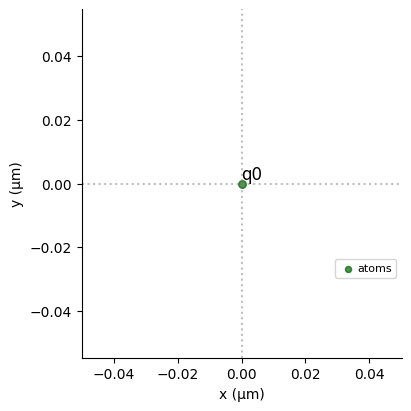

In [7]:
register = pulser.Register.from_coordinates([(0, 0)], prefix="q")
register.draw()

In [8]:
sequence = pulser.Sequence(register, device)


In [9]:
sequence.declare_channel("rydberg_global", "rydberg_global")
print(
    "The states used in the computation are", sequence.get_addressed_states()
)

The states used in the computation are ['r', 'g']


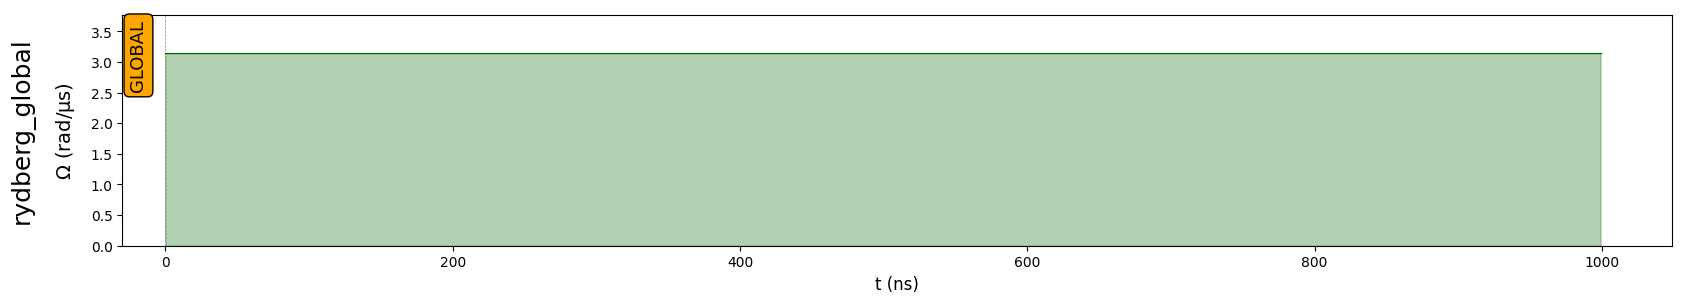

In [10]:
pi_pulse = pulser.Pulse.ConstantPulse(1000, np.pi, 0, 0)
sequence.add(pi_pulse, "rydberg_global")
sequence.draw(mode="input")

In [11]:
backend = pulser.backends.QutipBackend(sequence)
result = backend.run()

In [12]:
result.sample_final_state(1000)


Counter({'1': 1000})

In [13]:
# Parameters in rad/µs
U = 2 * np.pi
Omega_max = 2.0 * U
delta_0 = -6 * U
delta_f = 2 * U

# Parameters in ns
t_rise = 252
t_fall = 500
t_sweep = (delta_f - delta_0) / (2 * np.pi * 10) * 1000

In [38]:
R_interatomic = (device.interaction_coeff / U) ** (1 / 6)
R_interatomic

7.186760677748386

In [14]:
device = pulser.AnalogDevice
print(device.specs)

A realistic device for analog sequence execution.

Register parameters:
 - Dimensions: 2D
 - Maximum number of atoms: 80
 - Maximum distance from origin: 38 µm
 - Minimum distance between neighbouring atoms: 5 μm

Layout parameters:
 - Requires layout: Yes
 - Accepts new layout: Yes
 - Minimal number of traps: 1
 - Maximum layout filling fraction: 0.5

Device parameters:
 - Rydberg level: 60
 - Ising interaction coefficient: 865723.02
 - Channels can be reused: No
 - Supported bases: ground-rydberg
 - Supported states: r, g
 - SLM Mask: No
 - Maximum sequence duration: 6000 ns
 - Maximum number of runs: 2000

Channels:
 - 'rydberg_global': Rydberg(addressing='Global', max_abs_detuning=125.66370614359172, max_amp=12.566370614359172, min_retarget_interval=None, fixed_retarget_t=None, max_targets=None, clock_period=4, min_duration=16, max_duration=100000000, min_avg_amp=0, mod_bandwidth=8, custom_phase_jump_time=None, eom_config=RydbergEOM(limiting_beam=<RydbergBeam.RED: 2>, max_limiting_

Interatomic Radius is: 7.186760677748386µm.


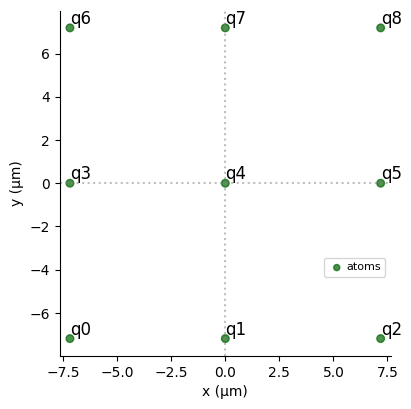

In [15]:
R_interatomic = (device.interaction_coeff / U) ** (1 / 6)
N_side = 3
register = pulser.Register.square(N_side, R_interatomic, prefix="q")
print(f"Interatomic Radius is: {R_interatomic}µm.")
register.draw()

In [17]:
sequence = pulser.Sequence(register, device)


In [18]:
sequence.declare_channel("rydberg_global", "rydberg_global")
print(
    "The states used in the computation are", sequence.get_addressed_states()
)


The states used in the computation are ['r', 'g']


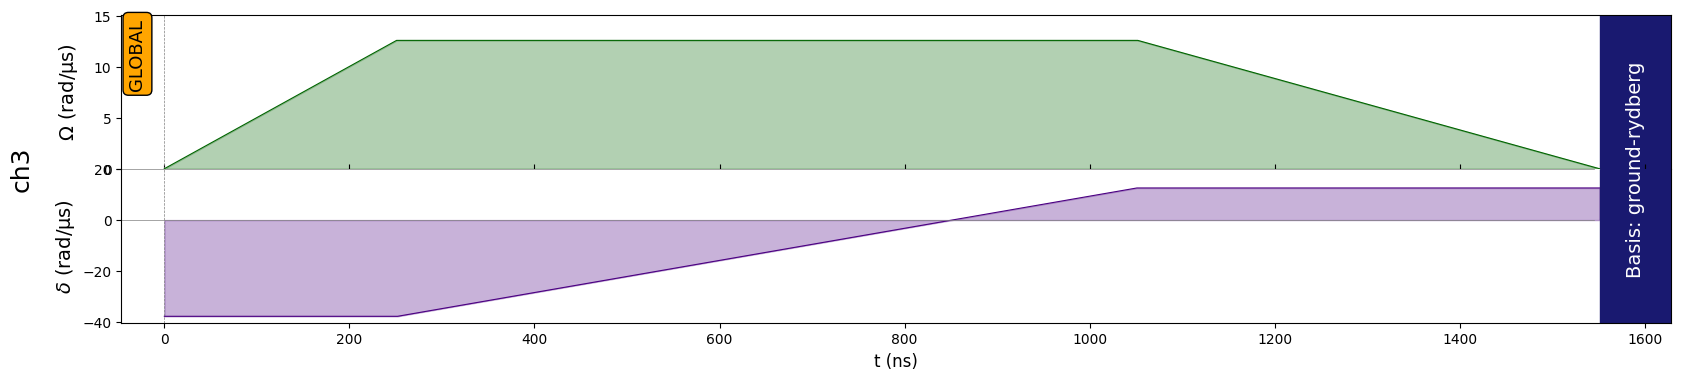

In [40]:
from pulser import Register, Sequence, Pulse
from pulser.devices import MockDevice
from pulser.waveforms import RampWaveform

reg = Register({
  "q0": (-7.189999999999998, -7.189999999999998),
  "q1": (0, -7.189999999999998),
  "q2": (7.189999999999998, -7.189999999999998),
  "q3": (-7.189999999999998, 0),
  "q4": (0, 0),
  "q5": (7.189999999999998, 0),
  "q6": (-7.189999999999998, 7.189999999999998),
  "q7": (0, 7.189999999999998),
  "q8": (7.189999999999998, 7.189999999999998),
})

seq = Sequence(reg, MockDevice)
seq.declare_channel("ch3", "rydberg_global")

amp1 = RampWaveform(252, 0, 12.566370614359172)
pulse1 = Pulse.ConstantDetuning(amp1, -37.699, 0)

det2 = RampWaveform(800, -37.69940569948579, 12.566076757950905)
pulse2 = Pulse.ConstantAmplitude(12.566370614359172, det2, 0)

amp3 = RampWaveform(500, 12.566370614359172, 0)
pulse3 = Pulse.ConstantDetuning(amp3, 12.566, 0)

seq.add(pulse1, "ch3")
seq.add(pulse2, "ch3")
seq.add(pulse3, "ch3")
seq.measure("ground-rydberg")

seq.draw()

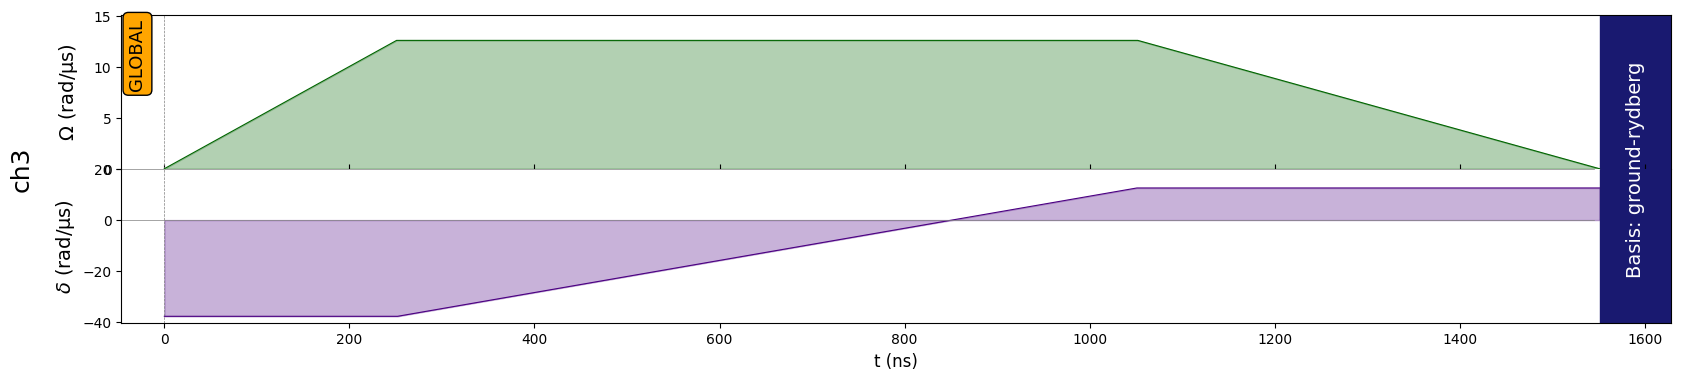

In [ ]:
from pulser import Register, Sequence, Pulse
from pulser.devices import MockDevice
from pulser.waveforms import RampWaveform

reg = Register({
  "q0": (-6.5, -6.5),
  "q1": (0, -6.5),
  "q2": (6.5, -6.5),
  "q3": (-6.5, 0),
  "q4": (0, 0),
  "q5": (6.5, 0),
  "q6": (-6.5, 6.5),
  "q7": (0, 6.5),
  "q8": (6.5, 6.5),
})

seq = Sequence(reg, MockDevice)
seq.declare_channel("ch3", "rydberg_global")

amp1 = RampWaveform(252, 0, 12.566370614359172)
pulse1 = Pulse.ConstantDetuning(amp1, -37.699, 0)

det2 = RampWaveform(800, -37.69940569948579, 12.566076757950905)
pulse2 = Pulse.ConstantAmplitude(12.566370614359172, det2, 0)

amp3 = RampWaveform(500, 12.566370614359172, 0)
pulse3 = Pulse.ConstantDetuning(amp3, 12.566, 0)

seq.add(pulse1, "ch3")
seq.add(pulse2, "ch3")
seq.add(pulse3, "ch3")
seq.measure("ground-rydberg")

seq.draw()

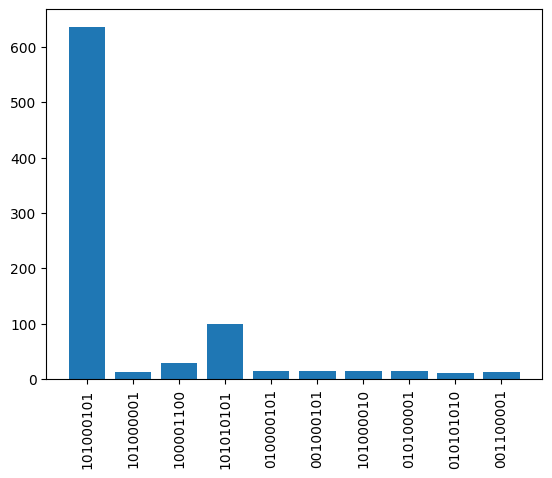

In [ ]:
backend = pulser.backends.QutipBackend(sequence)
result = backend.run()
counts = result.sample_final_state(1000)
# Let's plot the histogram associated to the measurements
# Let's select only the states that are measured more than 10 times
most_freq = {k: v for k, v in counts.items() if v > 10}
plt.bar(list(most_freq.keys()), list(most_freq.values()))
plt.xticks(rotation="vertical")
plt.show()

In [33]:
U = 2 * np.pi
Omega_max = 2.0 * U
delta_0 = -6 * U
delta_f = 2 * U

# Parameters in ns
t_rise = 252
t_fall = 500
t_sweep = (delta_f - delta_0) / (2 * np.pi * 10) * 1000

In [34]:
t_sweep

800.0

In [27]:
from pulser.waveforms import BlackmanWaveform, RampWaveform
from pulser import Sequence, Pulse, Register
from pulser.devices import MockDevice

reg = Register.from_coordinates([(0, 0)], prefix="q")
seq = Sequence(reg, MockDevice)

# Duration in ns
duration = 1000

# Omega: smooth envelope (amplitude)
omega_wf = BlackmanWaveform(duration, area=np.pi)

# Delta: linear ramp from -15 MHz to +15 MHz
delta_wf = RampWaveform(duration, -15e6, +15e6)

seq.declare_channel("ch", "rydberg_global")
adiabatic_pulse = Pulse(omega_wf, delta_wf, phase=0.0)
seq.add(adiabatic_pulse, "ch")


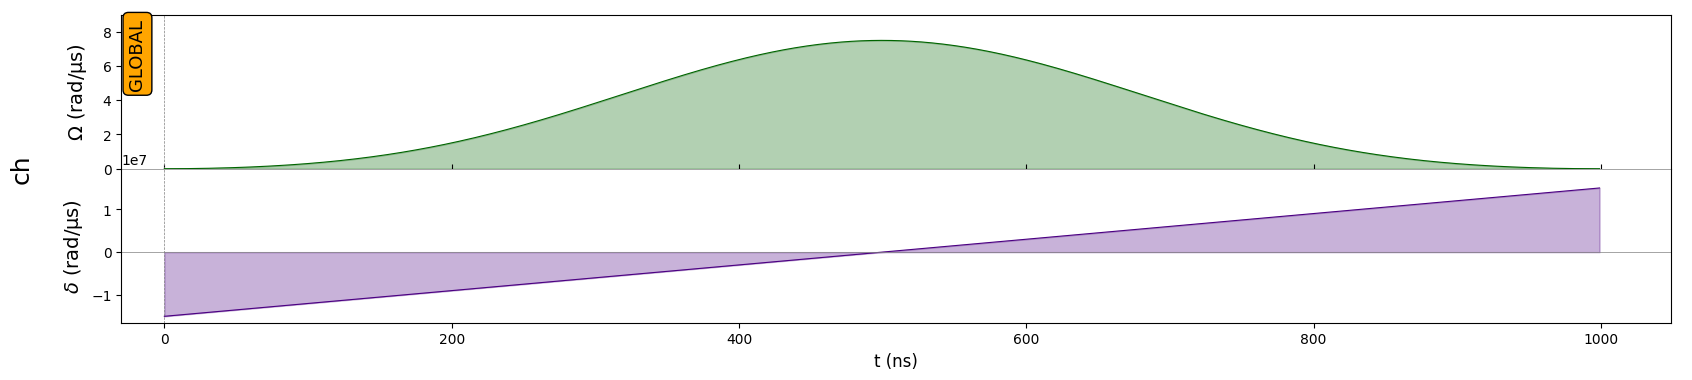

In [29]:
seq.draw(mode="input")